In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Data Description

In [2]:
players <- read_csv("https://raw.githubusercontent.com/paulxu6004/Personal-Project-DSCI-100/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/paulxu6004/Personal-Project-DSCI-100/refs/heads/main/sessions.csv")
players
players_summary <- summarize(players, mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))
players_summary

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


## `players` Data Description
There are 196 observations and 7 variables for `players` data. By summarizing the columns `played_hours` and `Age`, I found that the average is 5.8 and 20.5 for `played_hours` and `Age` respectively. 
### Descriptive Summary of Variables In `players` Data-Frame
| Variable name | Variable Type | Variable Meaning | 
| --- | --- | --- |
| `experience` | Character | The experience level of the player ranging from Beginner, Amateur, Regular, Veteran to Pro |
| `subscribe` | Character | Whether or not a player is subscribed to the newsletter |
| `hashedEmail` | Character | Unique hashed identifier for players email |
| `played_hours` | Double | Number of hours played by player |
| `name` | Character | First name of Player |
| `gender` | Character | Gender of player with options of Male, Female, Non-binary, Agender, Two-Spirited, Other, and Prefer not to say |
| `Age` | Double | Age of Player |


Upon observation, there are no issues with the data, it is tidy. However, there are many potential issues related to the data I can't see. Experience is not a completely subjective variable, so it is not comparable. The other issue is age and name, which are fully dependent on the user's honesty, and they could lie for both. However, lying about the age would make our summary of the age column inaccurate.  


In [3]:
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## `sessions` Data Description
There are 1535 observations and 5 variables for `sessions` data. I did not summarize the numerical double values in this data because it is pointless to get the average start and end times. The only thing I could do would be to get the average durations which would require extra data wrangling I do not need for my question.
### Descriptive Summary of Variables In `sessions` Data-Frame
| Variable name | Variable Type | Variable Meaning | 
| --- | --- | --- |
| `hashedEmail` | Character | Unique hashed identifier for players email |
| `start_time` | Character | The start time of the session |
| `end_time` | Character | The end time of the session |
| `original_start_time` | Double | The original start time of the session in epoch format counted in seconds |
| `original_end_time` | Double | The original end time of the session in epoch format counted in seconds |


In this, the issue with the original start and end times is that it is not precise enough to distinguish between most start and end times. The only use this would have would be an easy calculation of duration. However, because of how imprecise it is, it would lead to most durations being 0. This is not useful for anything so the original start and end times will be taken out.

In [4]:
new_sessions <- select(sessions, -original_start_time, - original_end_time) 
new_sessions

hashedEmail,start_time,end_time
<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45


# Questions
The **broad question** I will address is, "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

The **specific question** I have is, "Can played hours, and age predict if the player is subscribed to the newsletter in `players`?

The `players` data will give me the information on experience, played hours and age of every player. With that, I can plot 

You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

# Exploratory Data Analysis and Visualization



In my first exploratory plot, I want to first see if there is a relationship between played hours and age and whether the player is subscribed or not. For my specific question, both the played hours and age will be predictors. Thus, I will use a scatterplot to look for any relationship.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


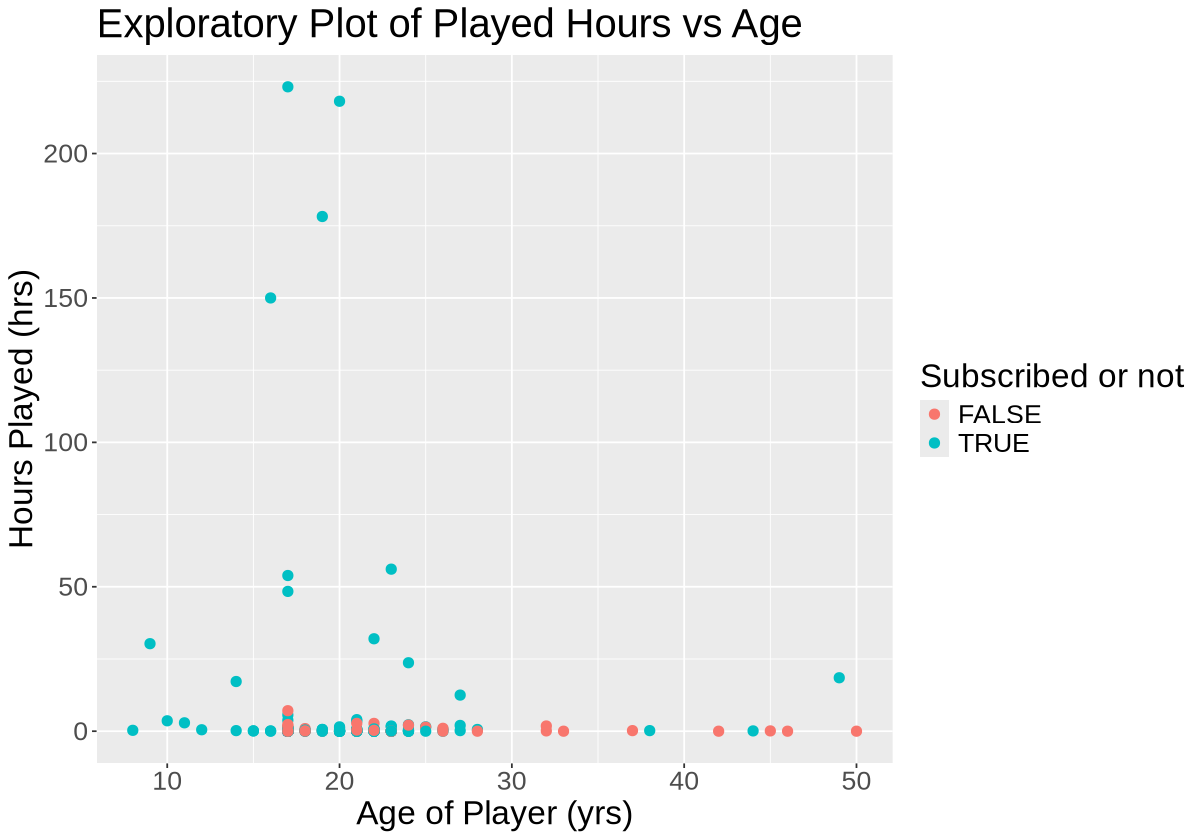

In [5]:
options(repr.plot.width=10, repr.plot.height=7)
hours_age_plot <- players |>  
    ggplot(aes(x= Age, 
               y= played_hours, 
               colour = subscribe)) +
        labs(title = "Exploratory Plot of Played Hours vs Age",
             x = "Age of Player (yrs)",
             y = "Hours Played (hrs)",
            colour = "Subscribed or not") +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))
hours_age_plot

I see that there is a much bigger range (0 - 225) of hours played than the age of players (0 - 50). Thus I will need to scale these variables for them to be comparable later on for my question. I also notice that almost all people except 6 played under 50 hours and most played under 10 hours. All players that have played more than 10 hours are subscribed to the newsletter. This shows that there is a chance people who play more are more likely to be subscribed. 

# Methods and Plan
The method I would have to use to predict whether or not a player is subscribed from their play hours and age is kNN-regression. This is because this method can capture non-linear relationships without assuming a specific functional form. It is interpretable because it predicts based on the similarity/distance between data points. However, kNN assumes that features are scaled to avoid bias in distance calculations. It's limited in its sensitivity to noise. The most optimal number of neighbors (k) is also an issue, as small k can overfit and large k can underfit. I'm going to need to preprocess the data by scaling features and removing missing values. I also need to split the data into training and testing sets 75-25.b I need to fit the model using the class::knn() function and then evaluate performance using metrics like accuracy, precision, and recall. I also need to do cross-validation to find the best k. 